In [1]:
using DSP, WAV
using Plots
using AbstractFFTs
using ChemometricsTools
using Shapefile
using Images, ImageMagick
using StatsBase
using Distances
using Statistics
using FFTW
using AbstractFFTs
using Distributions
using Random

In [2]:
Fs = 1000 #Sampling Frequency
seconds = 1 #number of seconds for the sound
tt = range(0, stop=seconds, length=Fs*seconds) #evenly spaced time points where the system was 'sampled'
d_err1 = Normal(0.0, 1)

Normal{Float64}(μ=0.0, σ=1.0)

In [3]:
freq = 100#frequency of the signal
group1_1 = sin.(2*pi*freq*tt) .+ rand(d_err1,length(tt))#create tone
freq = 90 #frequency of the signal
group1_2 = sin.(2*pi*freq*tt) .+ rand(d_err1,length(tt)) #create tone
freq = 110 #frequency of the signal
group1_3 = sin.(2*pi*freq*tt) .+ rand(d_err1,length(tt)) #create tone
freq = 95 #frequency of the signal
group1_4 = sin.(2*pi*freq*tt) .+ rand(d_err1,length(tt)) #create tone
freq = 105 #frequency of the signal
group1_5 = sin.(2*pi*freq*tt) .+ rand(d_err1,length(tt)); #create tone

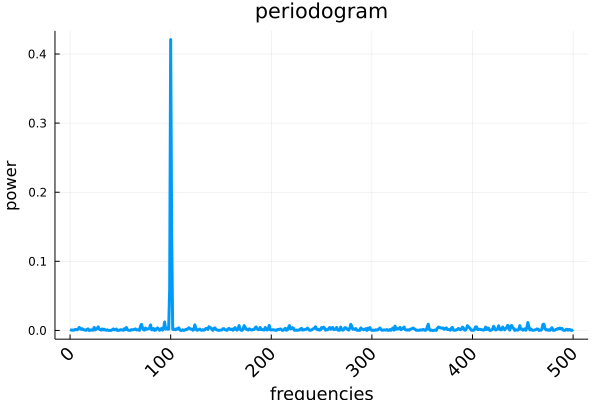

In [4]:
prdgrm = DSP.Periodograms.periodogram(group1_1, fs=Fs, window=DSP.Windows.hamming)
p = plot(prdgrm.freq,prdgrm.power,legend=false,linewidth=3,xrotation=45,         
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="periodogram")
display("image/png", p)

In [5]:
fieldnames(typeof(prdgrm))

(:power, :freq)

In [6]:
prdgrm.power

501-element Vector{Float64}:
 0.0012295459356938797
 0.0006674533906189621
 0.0004064533385218422
 0.0004757338769623008
 0.00038707749509611964
 0.001404698347702445
 0.0012888531717555498
 0.0009475576623967978
 0.0017553289141506994
 0.0042588166205771985
 0.0033033424589687483
 0.0015004524063161088
 0.0025439447642273444
 ⋮
 0.0028676688867544232
 0.0007050231438340368
 0.00011071558174052037
 0.00016945365897019728
 0.001308391892378006
 0.0016867668866801802
 0.00027330929691101114
 0.0014885061361702076
 0.0010886410191044025
 9.177478185862002e-5
 0.00014587576708811328
 0.001371348440785776

In [7]:
freq = 300 #frequency of the signal
group2_1 = sin.(2*pi*freq*tt) #create tone
freq = 310 #frequency of the signal
group2_2 = sin.(2*pi*freq*tt) #create tone
freq = 290 #frequency of the signal
group2_3 = sin.(2*pi*freq*tt) #create tone
freq = 305 #frequency of the signal
group2_4 = sin.(2*pi*freq*tt) #create tone
freq = 295 #frequency of the signal
group2_5 = sin.(2*pi*freq*tt); #create tone

In [8]:
reduce(vcat,[group1_2', group1_3', group1_4', group1_5', group2_1', group2_2', group2_3', group2_4', group2_5'],init=group1_1')

10×1000 Matrix{Float64}:
 -0.690131  -1.09206    1.30063   …  -0.0912378  -0.112139   0.0342267
 -0.145882  -1.40699   -0.334148     -0.41749     0.427124   0.293846
  1.35094    0.844574   1.74466      -0.944706   -1.24114   -1.18354
 -0.337526   1.19934   -0.186338     -1.78634     0.47645   -0.51465
 -1.07209    1.32574    2.82323      -1.01658     1.91331    1.26722
  0.0        0.950472  -0.590834  …   0.590834   -0.950472  -1.01901e-13
  0.0        0.929057  -0.687384      0.687384   -0.929057  -9.0139e-14
  0.0        0.968128  -0.484947      0.484947   -0.968128  -1.13662e-13
  0.0        0.940229  -0.640375      0.640375   -0.940229   1.76671e-14
  0.0        0.959774  -0.538956      0.538956   -0.959774   5.90554e-15

In [9]:
#instead of going about it in this route lets use the functional calls to chain/pipe the commands together

In [10]:
frequencies = [100,90,110,95,105,300,310,290,305,295];

In [11]:
signal_powers = map(freq -> sin.(2*pi*freq*tt),frequencies) |> signals -> 
    map(signal -> DSP.Periodograms.periodogram(signal, fs=Fs, window=DSP.Windows.hamming),signals) |> periodograms ->
        map(periodogram -> periodogram.power,periodograms)
size(signal_powers)

(10,)

In [12]:
signal_powers

10-element Vector{Vector{Float64}}:
 [5.086745936152052e-32, 3.0046905645783015e-12, 1.2026065201201796e-11, 2.7086065639577136e-11, 4.822137122783065e-11, 7.548356464681606e-11, 1.0893936537062898e-10, 1.4867093321738268e-10, 1.9477624332228206e-10, 2.4736953684656077e-10  …  3.41394625679492e-9, 3.4132523133810773e-9, 3.4126401784274534e-9, 3.4121097887719716e-9, 3.41166108990874e-9, 3.411294035560338e-9, 3.4110085880588188e-9, 3.4108047179188303e-9, 3.4106824042429448e-9, 1.7053208172086703e-9]
 [7.550763463284741e-32, 3.7574576660673625e-12, 1.5041061966964535e-11, 3.388456922768772e-11, 6.034444813604982e-11, 9.450019430164018e-11, 1.3645477425440623e-10, 1.8633520378447512e-10, 2.4429326507355617e-10, 3.105063703859806e-10  …  2.7293023712413058e-9, 2.728767030524686e-9, 2.7282947948706172e-9, 2.7278856177325554e-9, 2.7275394589799874e-9, 2.7272562845245174e-9, 2.727036066576038e-9, 2.7268787835004777e-9, 2.726784419823095e-9, 1.3633764831500795e-9]
 [2.2759202401380323e-33, 2.44

In [13]:
#let's put the data into columns for each signal instead of having it as a vector of the result
signal_powers_cols = reduce(hcat,signal_powers[2:end],init=signal_powers[1])

501×10 Matrix{Float64}:
 5.08675e-32  7.55076e-32  2.27592e-33  …  6.70954e-31  1.90067e-31
 3.00469e-12  3.75746e-12  2.44766e-12     1.56514e-13  1.78665e-13
 1.20261e-11  1.50411e-11  9.79559e-12     6.26106e-13  7.14718e-13
 2.70861e-11  3.38846e-11  2.20586e-11     1.40892e-12  1.60834e-12
 4.82214e-11  6.03444e-11  3.92615e-11     2.50521e-12  2.85981e-12
 7.54836e-11  9.45002e-11  6.14391e-11  …  3.91531e-12  4.46957e-12
 1.08939e-10  1.36455e-10  8.86363e-11     5.63967e-12  6.43813e-12
 1.48671e-10  1.86335e-10  1.20909e-10     7.67883e-12  8.76614e-12
 1.94776e-10  2.44293e-10  1.58322e-10     1.00334e-11  1.14544e-11
 2.4737e-10   3.10506e-10  2.00952e-10     1.27042e-11  1.45037e-11
 3.06582e-10  3.85179e-10  2.48888e-10  …  1.5692e-11   1.79152e-11
 3.72562e-10  4.68542e-10  3.02229e-10     1.89978e-11  2.169e-11
 4.45475e-10  5.60857e-10  3.61085e-10     2.26225e-11  2.58292e-11
 ⋮                                      ⋱               
 3.41558e-9   2.73056e-9   4.1938e-9 

In [47]:
#now a 'label' vector for the 'target'
labels = ["1","1","1","1","1","2","2","2","2","2"];

In [15]:
using DecisionTree

In [16]:
#train a decision tree to these periodogram power signatures
model = build_tree(labels, signal_powers_cols')

Decision Tree
Leaves: 2
Depth:  1

In [17]:
print_tree(model)

Feature 501, Threshold 1.4489658297406972e-8
L-> 1 : 5/5
R-> 2 : 5/5


In [18]:
freq = 305#frequency of the signal
groupU_1 = sin.(2*pi*freq*tt) #create tone
u1 = DSP.Periodograms.periodogram(groupU_1, fs=Fs, window=DSP.Windows.hamming).power
freq = 90#frequency of the signal
groupU_2 = sin.(2*pi*freq*tt);#create tone
u2 = DSP.Periodograms.periodogram(groupU_2, fs=Fs, window=DSP.Windows.hamming).power;

In [19]:
#apply the tree to make a prediction
apply_tree(model, u1)

"2"

In [20]:
#apply the tree to make a prediction
apply_tree(model, u2)

"1"

In [21]:
#more challenging examples for the model
freq = 250#frequency of the signal
groupU_3 = sin.(2*pi*freq*tt);#create tone
u3 = DSP.Periodograms.periodogram(groupU_3, fs=Fs, window=DSP.Windows.hamming).power
freq = 140#frequency of the signal
groupU_4 = sin.(2*pi*freq*tt);#create tone
u4 = DSP.Periodograms.periodogram(groupU_4, fs=Fs, window=DSP.Windows.hamming).power
freq = 40#frequency of the signal
groupU_5 = sin.(2*pi*freq*tt);#create tone
u5 = DSP.Periodograms.periodogram(groupU_5, fs=Fs, window=DSP.Windows.hamming).power;
freq = 340#frequency of the signal
groupU_6 = sin.(2*pi*freq*tt);#create tone
u6 = DSP.Periodograms.periodogram(groupU_6, fs=Fs, window=DSP.Windows.hamming).power;

In [22]:
#apply the tree to make a prediction
apply_tree(model, u3)

"2"

In [23]:
#apply the tree to make a prediction
apply_tree(model, u4)

"1"

In [24]:
#apply the tree to make a prediction
apply_tree(model, u5)

"1"

In [25]:
apply_tree_proba(model, u5, ["1", "2"])

2-element Vector{Float64}:
 1.0
 0.0

In [26]:
apply_tree(model, u6)

"2"

In [29]:
freq = 100:5:300
groupU = sin.(2*pi*freq*tt);#create tone
uu = DSP.Periodograms.periodogram(groupU, fs=Fs, window=DSP.Windows.hamming).power
apply_tree(model, uu)

"2"

In [38]:
labels_res = map(ff-> sin.(2*pi*ff*tt) , 100:5:300) |> signals ->
    map(signal->DSP.Periodograms.periodogram(signal, fs=Fs, window=DSP.Windows.hamming).power,signals) |>
    powers -> map( power-> apply_tree(model, power),powers)

41-element Vector{String}:
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 ⋮
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"
 "2"

In [40]:
findall(labels_res .== "2")

12-element Vector{Int64}:
 30
 31
 32
 33
 34
 35
 36
 37
 38
 39
 40
 41

In [45]:
collect( 100:5:300 )[30]

245

In [46]:
#let's do PCA on this data

In [54]:
signals_cov = cov(signal_powers_cols,dims=2,corrected=true)

501×501 Matrix{Float64}:
  4.19124e-62  -1.27199e-43  -5.09122e-43  …   2.80972e-39   1.40479e-39
 -1.27199e-43   2.43248e-24   9.7366e-24      -4.68176e-20  -2.34076e-20
 -5.09122e-43   9.7366e-24    3.89732e-23     -1.87394e-19  -9.36926e-20
 -1.14674e-42   2.19325e-23   8.77903e-23     -4.22104e-19  -2.11041e-19
 -2.04169e-42   3.90538e-23   1.56323e-22     -7.51568e-19  -3.75765e-19
 -3.19626e-42   6.11479e-23   2.4476e-22   …  -1.17666e-18  -5.88303e-19
 -4.6134e-42    8.82759e-23   3.53347e-22     -1.69853e-18  -8.49222e-19
 -6.29679e-42   1.20514e-22   4.82386e-22     -2.31856e-18  -1.15922e-18
 -8.25076e-42   1.57951e-22   6.32238e-22     -3.03842e-18  -1.51913e-18
 -1.04804e-41   2.00693e-22   8.03324e-22     -3.86006e-18  -1.92993e-18
 -1.29915e-41   2.48861e-22   9.96128e-22  …  -4.78572e-18  -2.39274e-18
 -1.57908e-41   3.02591e-22   1.2112e-21      -5.81792e-18  -2.90882e-18
 -1.88855e-41   3.62039e-22   1.44915e-21     -6.95952e-18  -3.47958e-18
  ⋮                       

In [64]:
using LinearAlgebra

In [66]:
signals_eig_vals = eigvals(signals_cov)

501-element Vector{Float64}:
 -1.8036221146689277e-17
 -1.752089185954965e-17
 -1.6322344582858503e-17
 -1.5385096485961236e-17
 -1.3502736815073923e-17
 -1.104823838200627e-17
 -9.436343063412116e-18
 -8.638981940645777e-18
 -6.9155586056752436e-18
 -5.664233050395121e-18
 -4.765304655853448e-18
 -3.987377866859686e-18
 -2.8025393182178565e-18
  ⋮
  1.5165465880408215e-17
  1.9130443914566063e-17
  2.267872689749066e-17
  0.01417040308009914
  0.01421240973091624
  0.01425418708454902
  0.014296702356883679
  0.014956419875219694
  0.015632507743538197
  0.015659929217939232
  0.015685784115447916
  0.015710668624982018

In [65]:
signals_eig_vecs = eigvecs(signals_cov)

501×501 Matrix{Float64}:
  5.89531e-31  -6.62888e-32   2.05215e-31  …   5.41548e-32   1.30386e-31
 -1.06324e-11  -1.71217e-12  -3.37853e-12     -1.68352e-12   1.65958e-12
 -2.05815e-11  -8.35637e-12  -3.03367e-12     -6.74182e-12   6.64645e-12
  3.97064e-11   4.10722e-11  -2.17441e-11     -1.51982e-11   1.49851e-11
  4.23942e-11   8.2447e-11   -3.0162e-11      -2.70916e-11   2.67167e-11
  1.97215e-10  -1.13219e-10  -6.20238e-11  …  -4.2477e-11    4.1899e-11
  1.16129e-10   9.75075e-11   7.40126e-11     -6.14258e-11   6.06073e-11
  9.74146e-11   2.18815e-10  -2.02572e-10     -8.4026e-11    8.29345e-11
 -2.93354e-10   1.22044e-10   2.17448e-10     -1.10383e-10   1.08992e-10
  8.73425e-11   4.26873e-10  -5.47074e-10     -1.40621e-10   1.38911e-10
  1.01336e-11   3.71377e-10  -2.08005e-11  …  -1.74883e-10   1.72842e-10
 -9.04431e-10  -6.85741e-10  -4.55582e-10     -2.13332e-10   2.10959e-10
 -1.43751e-9   -3.11539e-10  -8.15046e-10     -2.56151e-10   2.53456e-10
  ⋮                        

In [63]:
signals_eig_vals

search:

Couldn't find eigvecs
Perhaps you meant Weights


No documentation found.

Binding `eigvecs` does not exist.


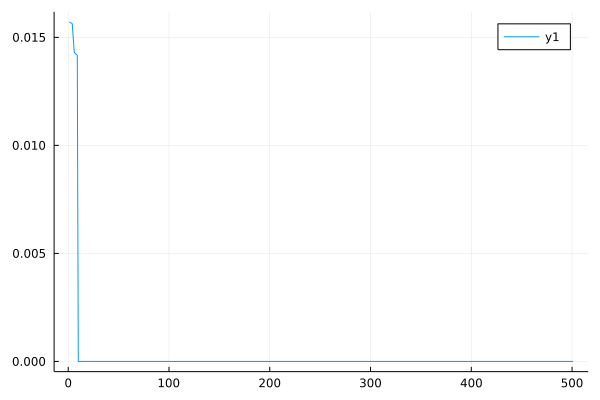

In [73]:
plot(1:length(signals_eig_vals),sort(signals_eig_vals,rev=true))

In [72]:
ind1 = findall(signals_eig_vals .== sort(signals_eig_vals,rev=true)[1])
ind2 = findall(signals_eig_vals .== sort(signals_eig_vals,rev=true)[2])

1-element Vector{Int64}:
 500

In [75]:
ind1

1-element Vector{Int64}:
 501

In [82]:
singal_proj_vecs = hcat(signals_eig_vecs[:,ind1],signals_eig_vecs[:,ind2]);

In [85]:
signal2D = signal_powers_cols' * singal_proj_vecs

10×2 Matrix{Float64}:
 -0.0678133    0.224591
  0.322074    -0.0868464
 -0.0290419    0.0464135
 -0.174698    -0.273579
 -0.0411221    0.0785677
 -0.00155584   0.00180185
 -0.0014702    0.00170121
 -0.00164918   0.00191173
 -0.00151223   0.00175058
 -0.00160159   0.00185569

In [98]:
tmpcols=[repeat(["red"],5); repeat(["blue"],5)]

10-element Vector{String}:
 "red"
 "red"
 "red"
 "red"
 "red"
 "blue"
 "blue"
 "blue"
 "blue"
 "blue"

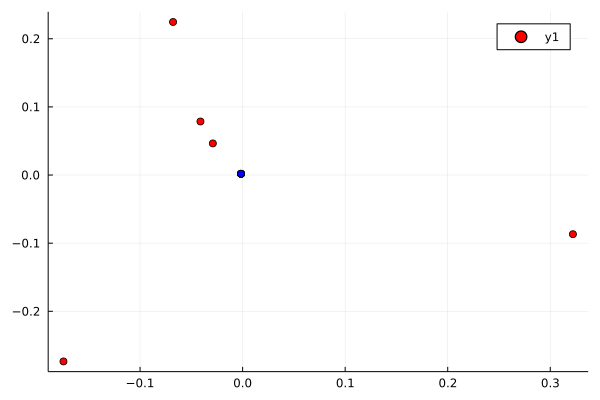

In [99]:
scatter(signal2D[:,1],signal2D[:,2],color=tmpcols )

# animal sounds now

the bird calls came from *xeno-cato.org*

dog barks from 

"Free Sounds Library"


Free Sound Effects Site.


Licence: License: Attribution 4.0 International (CC BY 4.0). You are allowed to use sound effects free of charge and royalty free in your multimedia projects for commercial or non-commercial purposes.

http://www.freesoundslibrary.com

cat meow from https://quicksounds.com/library/sounds/cat

In [ ]:
run(`ls`)

In [37]:
relativePath_bird = "./animalSounds/bird/"
fileWAVs_bird = readdir(relativePath_bird) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_bird)

["BirdChirping.wav", "CommonFirecrest.wav", "NeblinaTapaculo.wav", "NorthernMockingBird.wav", "SongThrush.wav"]


In [110]:
relativePath_cat = "./animalSounds/cat/"
fileWAVs_cat = readdir(relativePath_cat) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_cat)

["KittenMeow.wav", "KittenSound.wav", "Kittens.wav", "TwoCats.wav", "TwoCatsMeowing.wav"]


In [130]:
relativePath_dog = "./animalSounds/dog/"
fileWAVs_dog = readdir(relativePath_dog) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_dog)

["DogBarkingSound.wav", "WolfDog.wav", "dogBarkingShortSoundEffect.wav", "largeDogBarkOnceSoundEffect.wav", "singDogWoofSound.wav"]


In [70]:
bird_signals = []
Fs_bird = []
for filename in fileWAVs_bird
    ss, Fs = wavread(relativePath_bird*filename)
    push!(Fs_bird,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(bird_signals,ss[:,1])
end

In [111]:
cat_signals = []
Fs_cat = []
for filename in fileWAVs_cat
    ss, Fs = wavread(relativePath_cat*filename)
    push!(Fs_cat,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(cat_signals,ss[:,1])
end

In [131]:
dog_signals = []
Fs_dog = []
for filename in fileWAVs_dog
    ss, Fs = wavread(relativePath_dog*filename)
    push!(Fs_dog,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(dog_signals,ss[:,1])
end

In [132]:
Fs_dog

5-element Array{Any,1}:
 44100.0f0
 44100.0f0
 44100.0f0
 44100.0f0
 44100.0f0

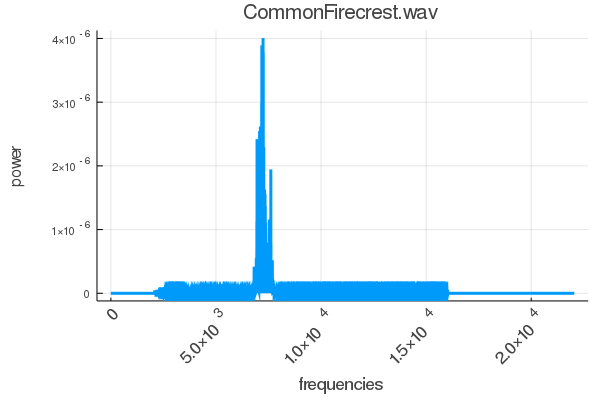

In [87]:
ss_ind = 2
prdgrm = DSP.Periodograms.periodogram(bird_signals[ss_ind], fs=Int(Fs_bird[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm.freq,prdgrm.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title=fileWAVs_bird[ss_ind])
display("image/png", p)

In [98]:
length_max = map(ind -> length(bird_signals[ind]),1:length(bird_signals)) |> lengths->maximum(lengths)
length_max

3749760

In [135]:
length_max_b = map(ind -> length(bird_signals[ind]),1:length(bird_signals)) |> lengths->maximum(lengths)

length_max_c = map(ind -> length(cat_signals[ind]),1:length(cat_signals)) |> lengths->maximum(lengths)
length_max = maximum([length_max_b,length_max_c])

3749760

In [140]:
bird_powers = map(ss_ind->DSP.Periodograms.periodogram(bird_signals[ss_ind],fs=Fs_bird[1],nfft=length_max, window=DSP.Windows.hamming),1:length(Fs_bird)) |> 
                    periodograms -> map(periodogram -> periodogram.power,periodograms)
bird_powers_cols = reduce(hcat,bird_powers[2:end],init=bird_powers[1])

LoadError: [91mnfft must be >= n[39m

In [137]:
Fs_cat

5-element Array{Any,1}:
 44100.0f0
 44100.0f0
 44100.0f0
 44100.0f0
 44100.0f0

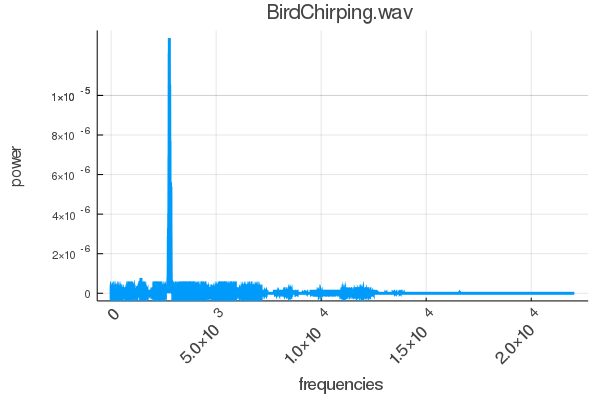

In [138]:
ss_ind = 1
prdgrm = DSP.Periodograms.periodogram(cat_signals[ss_ind], fs=Int(Fs_cat[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm.freq,prdgrm.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title=fileWAVs_bird[ss_ind])
display("image/png", p)

In [139]:
length_max = map(ind -> length(cat_signals[ind]),1:length(cat_signals)) |> lengths->maximum(lengths)
cat_powers = map(ss_ind->DSP.Periodograms.periodogram(cat_signals[ss_ind],fs=Int(Fs_cat[1]),nfft=length_max, window=DSP.Windows.hamming),1:length(Fs_bird)) |> 
                    periodograms -> map(periodogram -> periodogram.power,periodograms)
cat_powers_cols = reduce(hcat,cat_powers[2:end],init=cat_powers[1])

545793×5 Array{Float64,2}:
 1.52151e-7   2.24678e-10  6.02371e-9   1.16158e-9   1.16158e-9
 1.59737e-7   4.60898e-10  2.79416e-9   1.94882e-9   1.94882e-9
 1.36349e-8   4.95608e-10  2.33614e-10  1.10167e-9   1.10167e-9
 2.88716e-9   5.53729e-10  2.18493e-10  3.67953e-10  3.67953e-10
 4.19281e-9   6.35666e-10  2.61026e-10  8.29178e-11  8.29178e-11
 3.96754e-9   7.41976e-10  2.22822e-10  7.21695e-11  7.21695e-11
 1.08272e-8   8.73366e-10  2.35557e-10  5.74961e-11  5.74961e-11
 7.29634e-9   1.03068e-9   2.83463e-10  2.60831e-11  2.60831e-11
 3.10414e-9   1.21489e-9   2.44633e-10  4.32893e-11  4.32893e-11
 2.17119e-8   1.42709e-9   2.24893e-10  5.5849e-11   5.5849e-11
 3.74369e-8   1.66848e-9   2.33742e-10  3.43113e-11  3.43113e-11
 3.85039e-8   1.94032e-9   2.70597e-10  5.76652e-11  5.76652e-11
 3.00647e-8   2.24396e-9   2.52038e-10  1.58432e-10  1.58432e-10
 ⋮                                                   
 2.35104e-15  7.68548e-16  1.19979e-15  5.02328e-15  5.02328e-15
 1.93833e-15 